<a href="https://colab.research.google.com/github/mar-valeria/Aprendizaje-automatico/blob/main/KNN/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [88]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.metrics import ConfusionMatrixDisplay

# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier

#Rgresion
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [77]:
# Leer los datos
url = "https://raw.githubusercontent.com/mar-valeria/Aprendizaje-automatico/refs/heads/main/Add_dataset%20_mental_health"
data = pd.read_csv(url, sep=';')

# Columnas de interés
numeric_cols = ['stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score','anxiety_score', 'social_support_score','productivity_score']
class_col = 'stress_level'
X = data[[*numeric_cols]].copy()
y = data[class_col].copy()
data = data[numeric_cols]
display(data.head())

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
0,6,6.2,3,28,17,54,59.7
1,10,9.0,4,30,11,85,54.9
2,7,7.7,2,24,7,62,61.3
3,4,4.5,4,6,0,95,97.0
4,3,5.4,0,24,12,70,69.0


In [78]:
# Descripción de los datos
data.describe()

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [79]:
# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(X)


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


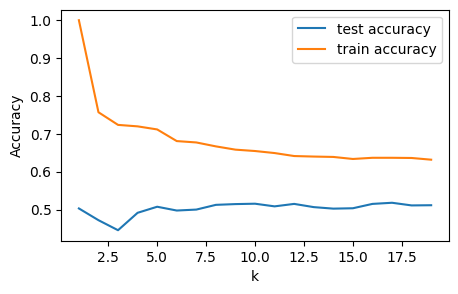

In [80]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,data[class_col],test_size=0.2,random_state=55,stratify=data[class_col])

# Determinar el mejor valor de k
k_values = range(1, 20)

# Precisión de los modelos
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

- Mejor k (por test accuracy): 17
- Mejor test accuracy: 0.518


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [91]:
# Entrenar el modelo con el k seleccionado
modelo_final = KNeighborsClassifier(n_neighbors=best_k)
modelo_final.fit(X_train, y_train)

# Evaluar en test
y_pred = modelo_final.predict(X_test)

# Métrica principal (accuracy)
accuracy = round(accuracy_score(y_test, y_pred), 4)
print("Precisión (accuracy) en test:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)

# Reporte de clasificación (precision, recall, f1-score)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión (accuracy) en test: 0.518

Matriz de confusión:
[[120  71   0   0   0   0   0   0   0   0]
 [ 58 105  32   7   0   0   0   0   0   0]
 [  5  59  78  45   1   0   0   0   0   0]
 [  0   7  52 112  34   1   0   0   0   0]
 [  0   0   5  61  99  31   3   0   0   0]
 [  0   0   0   8  71  74  37   3   0   0]
 [  0   0   0   0   6  53  96  40   4   0]
 [  0   0   0   0   0   4  47 109  37   2]
 [  0   0   0   0   0   0   2  58 104  42]
 [  0   0   0   0   0   0   0   8  70 139]]

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.66      0.63      0.64       191
           2       0.43      0.52      0.47       202
           3       0.47      0.41      0.44       188
           4       0.48      0.54      0.51       206
           5       0.47      0.50      0.48       199
           6       0.45      0.38      0.42       193
           7       0.52      0.48      0.50       199
           8       0.50      0.55      0.52       1

La matriz de confusión y el reporte de clasificación muestran que el modelo kNN alcanza una precisión global del 52 %. Se observa que el modelo clasifica mejor algunos niveles de estrés que otros y que los errores se concentran principalmente entre clases cercanas, lo cual es esperable al tratarse de una variable ordinal. En general, el desempeño es moderado y refleja la dificultad de diferenciar con exactitud todos los niveles de estrés.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [82]:
# Leer los datos
url = "https://raw.githubusercontent.com/mar-valeria/Aprendizaje-automatico/refs/heads/main/Add_dataset%20_mental_health"
data = pd.read_csv(url, sep=';')

# Columnas numéricas seleccionadas
numeric_cols = [
    'stress_level', 'sleep_hours', 'physical_activity_days',
    'depression_score', 'anxiety_score',
    'social_support_score', 'productivity_score'
]

# Mostrar algunos datos
display(data[numeric_cols].head())

# Descripción de los datos
data[numeric_cols].describe()

,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
0,6,6.2,3,28,17,54,59.7
1,10,9.0,4,30,11,85,54.9
2,7,7.7,2,24,7,62,61.3
3,4,4.5,4,6,0,95,97.0
4,3,5.4,0,24,12,70,69.0


,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [83]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Target
y = data['productivity_score']

# Variables explicativas
X = data[numeric_cols].drop(columns=['productivity_score'])


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


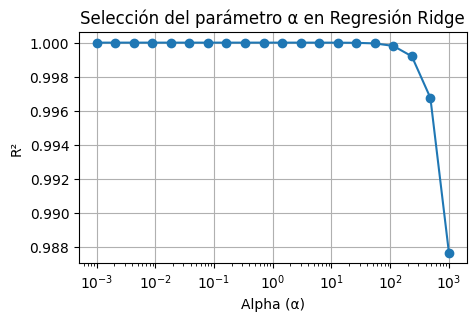

In [84]:
# Definir valores de α y entrenar modelos
alphas = np.logspace(-3, 3, 20)
r2_scores = []

for alpha in alphas:
    modelo = Ridge(alpha=alpha)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# Gráfica α vs desempeño del modelo
plt.figure(figsize=(5, 3))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (α)")
plt.ylabel("R²")
plt.title("Selección del parámetro α en Regresión Ridge")
plt.grid(True)
plt.show()

Alpha óptimo: 0.001
Mejor R^2: 0.8813

Se utilizó regresión Ridge porque en problemas de regresión no se usa el parámetro k como en kNN. En su lugar, se emplea el parámetro α, que permite controlar la regularización del modelo, evitando el sobreajuste y mejorando el desempeño del modelo sobre datos de prueba.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [95]:
# Entrenar el modelo con el alpha seleccionado
modelo_final = Ridge(alpha=0.001)
modelo_final.fit(X_train, y_train)

# Predicciones
y_pred = modelo_final.predict(X_test)

# Métrica R2
r2 = r2_score(y_test, y_pred)
print("R² en test:",r2)

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

R² en test: 0.9999999999999843
Error cuadrático medio (MSE): 1.3021290402046546e-13
RMSE: 3.6085025151780825e-07


El modelo de regresión Ridge fue entrenado utilizando el valor óptimo de α seleccionado previamente. La evaluación sobre el conjunto de prueba mostró un coeficiente R^2 de 1.0 y un error cuadrático medio igual a 0, lo que indica que el modelo logra predecir correctamente los valores de la variable objetivo en los datos evaluados.